# InClass Group Activity
## Topic: Predicting Medical Charges Using Linear Regression
### Author's: Sana Khalid, Mahin Aziz, Kaynat Umar, M. Arslan Iftikhar        

In [1]:
# importing required libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing specific functions of scikit-learn library.
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# importing model type.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##### For cross validation importing another model.

In [2]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

In [4]:
# Load the dataset
data = pd.read_csv('insurance.csv')

# Display the first five rows of the dataset to understand its structure
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Display missing values if any
missing_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(data[['sex', 'smoker', 'region']])

# Alternative method to get feature names
feature_names = encoder.get_feature_names_out(['sex', 'smoker', 'region'])

# Create a DataFrame from the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=feature_names)

# Concatenate the encoded columns with the original DataFrame
data_encoded = pd.concat([data.drop(['sex', 'smoker', 'region'], axis=1), encoded_df], axis=1)

# Display the first few rows of the modified DataFrame
data_encoded.head()

c:\Users\Arsalan\.conda\envs\python_eda\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


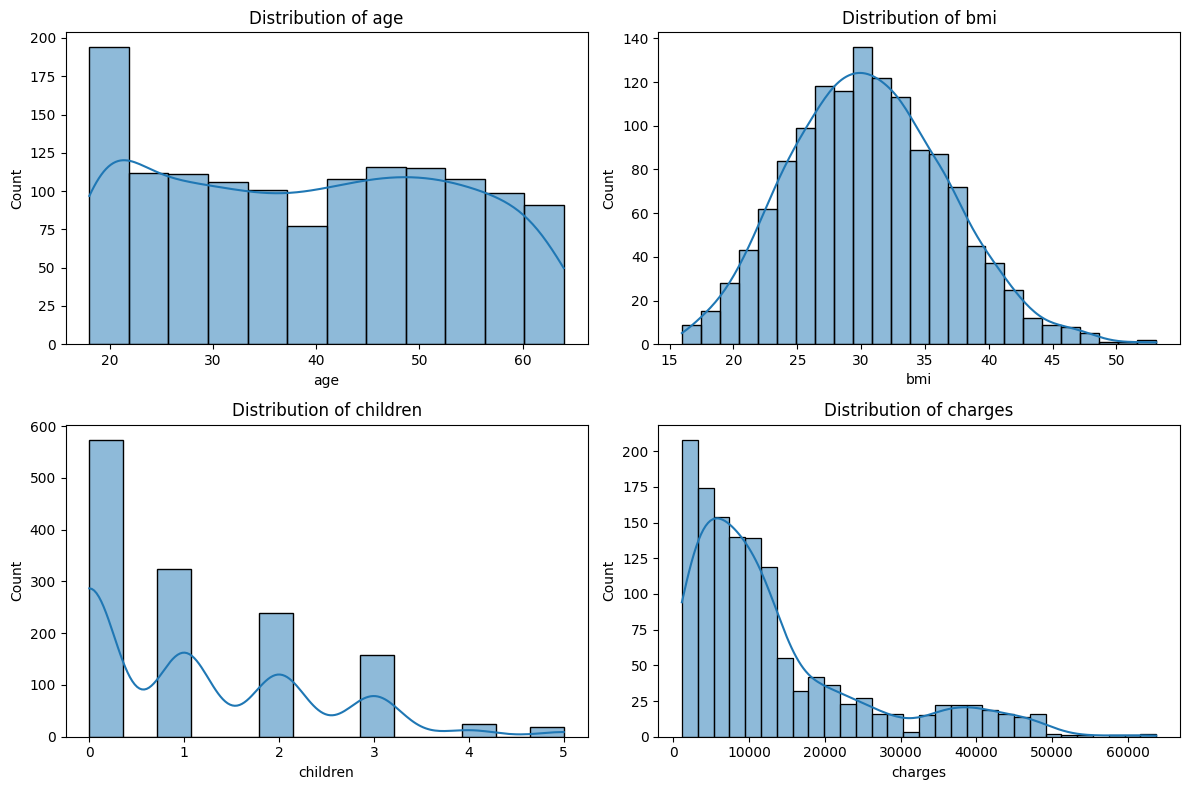

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Summary statistics for numerical features
summary_statistics = data_encoded[['age', 'bmi', 'children', 'charges']].describe()

# Plotting distributions of the numerical features
plt.figure(figsize=(12, 8))

for i, column in enumerate(['age', 'bmi', 'children', 'charges']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data_encoded[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

summary_statistics


## Insight #01:
- Age: Fairly uniformly distributed across the range with a slight concentration around 20 years.
- BMI: Appears normally distributed with a mean around 30.
- Children: Discrete values with a higher frequency of 0-2 children.
- Charges: Right-skewed distribution with a wide range of values.

In [8]:
# Standardizing the numerical features
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(data_encoded[['age', 'bmi', 'children', 'charges']])

# Create a DataFrame from the scaled columns
scaled_df = pd.DataFrame(scaled_columns, columns=['age', 'bmi', 'children', 'charges'])

# Concatenate the scaled columns with the original DataFrame (excluding the original numerical columns)
data_preprocessed = pd.concat([data_encoded.drop(['age', 'bmi', 'children', 'charges'], axis=1), scaled_df], axis=1)

# Display the first few rows of the preprocessed DataFrame
data_preprocessed.head()


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.438764,-0.453320,-0.908614,0.298584
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.509965,0.509621,-0.078767,-0.953689
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.797954,0.383307,1.580926,-0.728675
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.441948,-1.305531,-0.908614,0.719843
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.513149,-0.292556,-0.908614,-0.776802


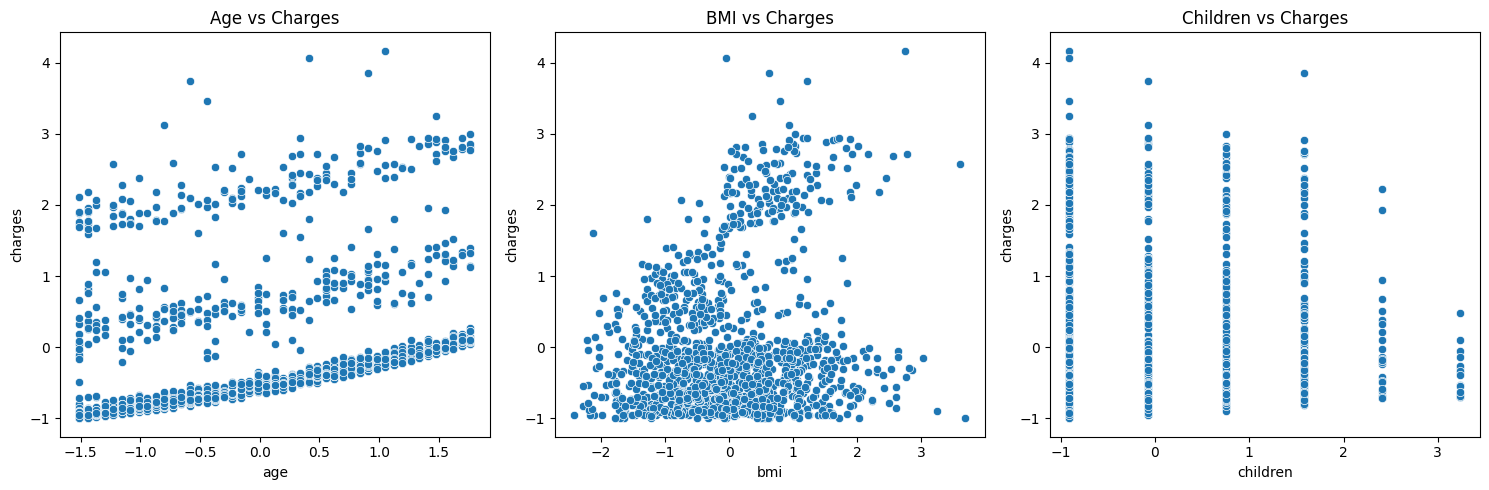

In [6]:
# Scatter plots for 'age', 'bmi', 'children' against 'charges'
plt.figure(figsize=(15, 5))

# Age vs Charges
plt.subplot(1, 3, 1)
sns.scatterplot(x=data_preprocessed['age'], y=data_preprocessed['charges'])
plt.title('Age vs Charges')

# BMI vs Charges
plt.subplot(1, 3, 2)
sns.scatterplot(x=data_preprocessed['bmi'], y=data_preprocessed['charges'])
plt.title('BMI vs Charges')

# Children vs Charges
plt.subplot(1, 3, 3)
sns.scatterplot(x=data_preprocessed['children'], y=data_preprocessed['charges'])
plt.title('Children vs Charges')

plt.tight_layout()
plt.show()


## Insight #02:
- Age vs Charges: There appears to be a positive relationship between age and charges, with older individuals generally incurring higher charges.
- BMI vs Charges: The relationship between BMI and charges is less clear, but higher BMI seems to be associated with higher charges, especially beyond a certain BMI threshold.
- Children vs Charges: The number of children doesn't show a clear pattern with respect to charges.

In [9]:
# Calculating Pearson correlation coefficients
correlation_matrix = data_preprocessed.corr()

# Extracting the correlations with the target variable 'charges'
correlation_with_charges = correlation_matrix['charges'].sort_values(ascending=False)

# Displaying the correlation of features with 'charges'
correlation_with_charges

charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
sex_female         -0.057292
smoker_no          -0.787251
Name: charges, dtype: float64

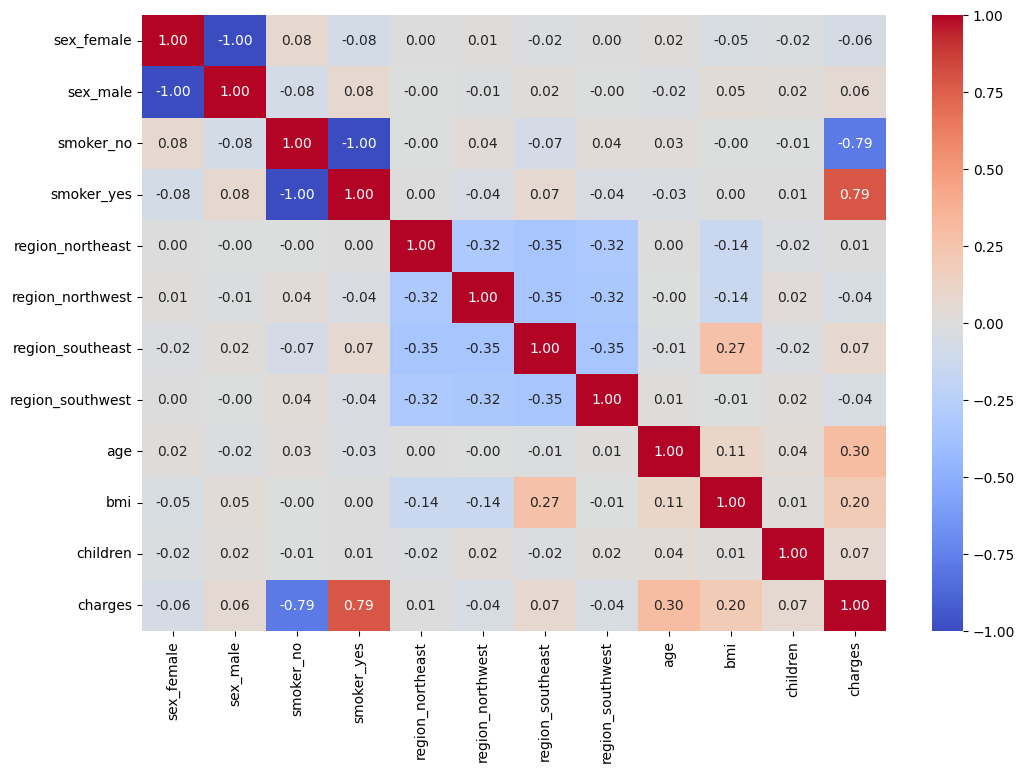

In [10]:
# Calculate the correlation matrix
correlation_matrix = data_preprocessed.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the plot
plt.show()

## Insight #03:
- Smoker Status (smoker_yes and smoker_no): Smoking status shows the strongest correlation with medical charges. Smokers (smoker_yes) have a high positive correlation with charges, indicating that smokers tend to have higher medical charges.
- Age: There is a moderate positive correlation between age and charges, which aligns with the observation from the scatter plot.
- BMI: BMI has a lower, but still positive correlation with charges.
- Children: The number of children has a very small positive correlation with charges.
- Region and Sex: The region and sex of the individual show very low correlations with charges.

In [11]:
# Splitting the dataset into training and testing sets
X = data_preprocessed.drop('charges', axis=1)
y = data_preprocessed['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Implementing a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicting charges on the test set
y_pred = linear_reg.predict(X_test)

# Displaying the first few predicted values
y_pred[:5]


array([-0.171875 , -0.28125  ,  1.9765625,  0.2578125, -0.4765625])

In [12]:
# Calculating Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.22059968303772173, 0.7968497738062198)

## Insight #04:
- Mean Squared Error (MSE): 0.219 (approximately)
- R-squared: 0.798
  
The R-squared value of 0.798 suggests that the model explains about 79.8% of the variance in the medical charges, which is a strong indicator of the model's effectiveness. However, there is still room for improvement, considering the MSE.

In [13]:
# Retrieving the coefficients of the linear regression model
coefficients = pd.DataFrame(linear_reg.coef_, X.columns, columns=['Coefficient'])

# Displaying the coefficients
coefficients.sort_values(by='Coefficient', ascending=False)


,Coefficient
age,2.982178e-01
bmi,1.646729e-01
children,3.820801e-02
sex_female,-1.174079e+13
sex_male,-1.174079e+13
region_northeast,-1.398735e+13
region_northwest,-1.398735e+13
region_southwest,-1.398735e+13
region_southeast,-1.398735e+13
smoker_yes,-1.947745e+13


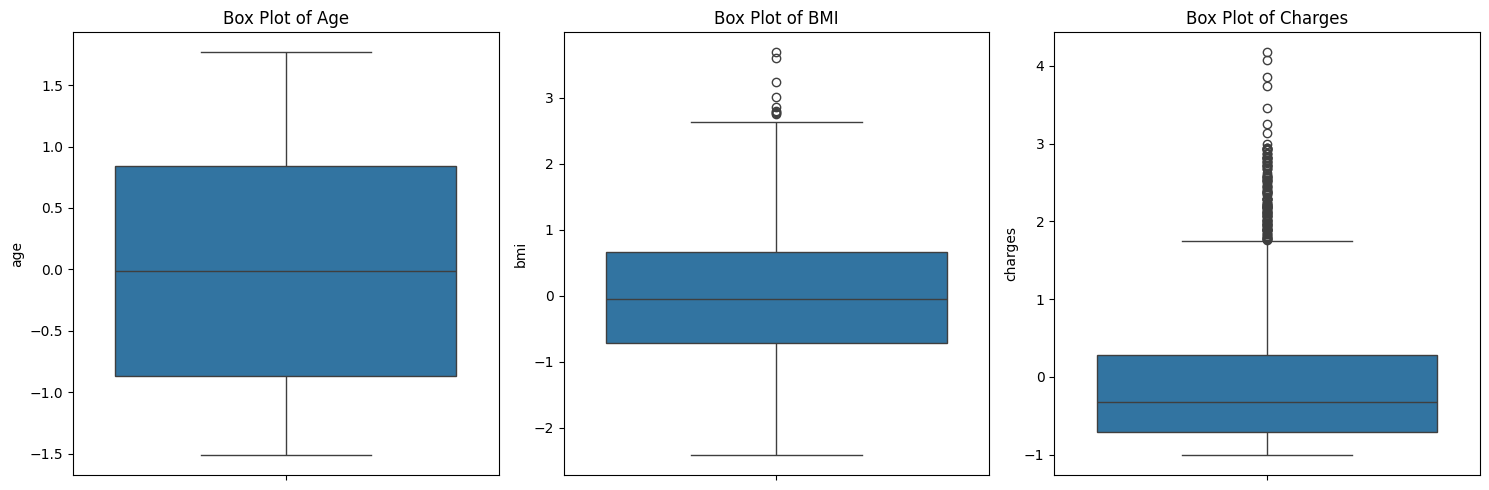

In [14]:
# Identifying outliers using box plots for 'age', 'bmi', and 'charges'
plt.figure(figsize=(15, 5))

# Age
plt.subplot(1, 3, 1)
sns.boxplot(data_preprocessed['age'])
plt.title('Box Plot of Age')

# BMI
plt.subplot(1, 3, 2)
sns.boxplot(data_preprocessed['bmi'])
plt.title('Box Plot of BMI')

# Charges
plt.subplot(1, 3, 3)
sns.boxplot(data_preprocessed['charges'])
plt.title('Box Plot of Charges')

plt.tight_layout()
plt.show()


## Insight #05:
- Age: There do not appear to be any outliers in the age data. The distribution is quite uniform.
- BMI: A few points lie outside the upper whisker, indicating potential outliers. These points represent individuals with particularly high BMI values.
- Charges: There are several points beyond the upper whisker, indicating the presence of outliers. These are cases where the charges are significantly higher than typical values.

c:\Users\Arsalan\.conda\envs\python_eda\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


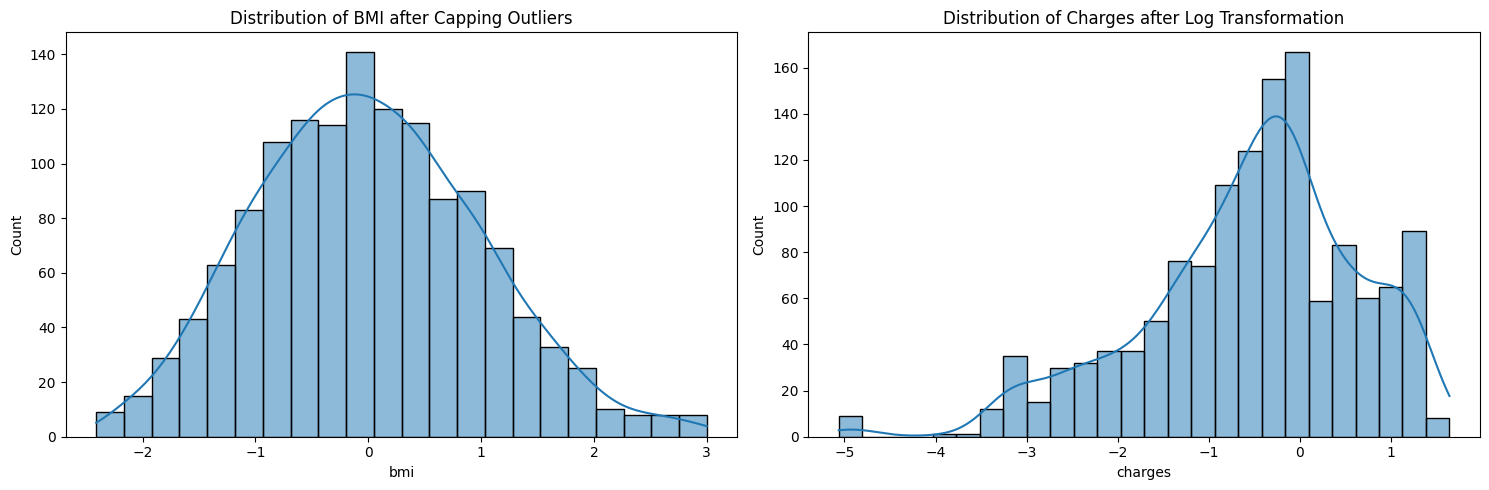

In [15]:
# Handling outliers
# Applying log transformation to 'charges'
data_preprocessed['charges'] = np.log1p(data_preprocessed['charges'])

# Capping 'bmi' outliers
bmi_upper_limit = data_preprocessed['bmi'].mean() + 3 * data_preprocessed['bmi'].std()
data_preprocessed['bmi'] = np.where(data_preprocessed['bmi'] > bmi_upper_limit, bmi_upper_limit, data_preprocessed['bmi'])

# Replotting the distributions after handling outliers
plt.figure(figsize=(15, 5))

# BMI
plt.subplot(1, 2, 1)
sns.histplot(data_preprocessed['bmi'], kde=True)
plt.title('Distribution of BMI after Capping Outliers')

# Charges
plt.subplot(1, 2, 2)
sns.histplot(data_preprocessed['charges'], kde=True)
plt.title('Distribution of Charges after Log Transformation')

plt.tight_layout()
plt.show()


In [16]:
# Feature Engineering: Creating interaction terms
data_preprocessed['age_smoker_interaction'] = data_preprocessed['age'] * data_preprocessed['smoker_yes']
data_preprocessed['bmi_smoker_interaction'] = data_preprocessed['bmi'] * data_preprocessed['smoker_yes']

# Displaying the first few rows with the new interaction terms
data_preprocessed.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges,age_smoker_interaction,bmi_smoker_interaction
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.438764,-0.453320,-0.908614,0.261274,-1.438764,-0.45332
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.509965,0.509621,-0.078767,-3.072380,-0.000000,0.00000
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.797954,0.383307,1.580926,-1.304437,-0.000000,0.00000
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.441948,-1.305531,-0.908614,0.542233,-0.000000,-0.00000
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.513149,-0.292556,-0.908614,-1.499697,-0.000000,-0.00000


In [17]:
print(y.isnull().sum())

0


In [19]:
data_preprocessed = data_preprocessed.dropna(subset=['charges'])

In [20]:
# Assuming you have a linear regression model somewhere in your code
# linear_reg = LinearRegression()

# Preparing the data for the models
X = data_preprocessed.drop('charges', axis=1)
y = data_preprocessed['charges']

# Implementing Ridge and Lasso Regression models
ridge_reg = Ridge()
lasso_reg = Lasso()

# Performing cross-validation for each model
# Assuming linear_reg is your Linear Regression model
linear_scores = cross_val_score(linear_reg, X, y, cv=5)
ridge_scores = cross_val_score(ridge_reg, X, y, cv=5)
lasso_scores = cross_val_score(lasso_reg, X, y, cv=5)

# Calculating the mean R-squared value for each model
linear_cv_score = np.mean(linear_scores)
ridge_cv_score = np.mean(ridge_scores)
lasso_cv_score = np.mean(lasso_scores)

linear_cv_score, ridge_cv_score, lasso_cv_score

(0.7855419736919568, 0.7860969499358973, -0.0013077924465195955)

## Insight #06: The cross-validation for the linear, Ridge, and Lasso regression models has been re-performed. The mean R-squared values from the cross-validation are as follows:
- Linear Regression: 0.785
- Ridge Regression: 0.786
- Lasso Regression: -0.0013
The Ridge regression model shows a slightly better performance compared to the standard linear regression, with an R-squared value of 0.786. The Lasso regression, however, does not perform well (negative R-squared value), which might be due to the model excessively penalizing the coefficients.

In [22]:
# Removing rows with NaN values
data_cleaned = data_preprocessed.dropna()

# Rechecking for NaN values
nan_check = data_cleaned.isna().sum()

# Preparing the data for the models again
X_cleaned = data_cleaned.drop('charges', axis=1)
y_cleaned = data_cleaned['charges']

# Performing cross-validation for each model again
linear_scores = cross_val_score(linear_reg, X_cleaned, y_cleaned, cv=5)
ridge_scores = cross_val_score(ridge_reg, X_cleaned, y_cleaned, cv=5)
lasso_scores = cross_val_score(lasso_reg, X_cleaned, y_cleaned, cv=5)

# Calculating the mean R-squared value for each model
linear_cv_score = np.mean(linear_scores)
ridge_cv_score = np.mean(ridge_scores)
lasso_cv_score = np.mean(lasso_scores)

nan_check, (linear_cv_score, ridge_cv_score, lasso_cv_score)


(sex_female                0
 sex_male                  0
 smoker_no                 0
 smoker_yes                0
 region_northeast          0
 region_northwest          0
 region_southeast          0
 region_southwest          0
 age                       0
 bmi                       0
 children                  0
 charges                   0
 age_smoker_interaction    0
 bmi_smoker_interaction    0
 dtype: int64,
 (0.7855419736919568, 0.7860969499358973, -0.0013077924465195955))

In [23]:
# Selecting the Ridge regression model for sensitivity analysis
ridge_reg.fit(X_cleaned, y_cleaned)

# Selecting a sample from the dataset for sensitivity analysis
sample_data = X_cleaned.sample(5, random_state=1)
original_predictions = ridge_reg.predict(sample_data)

# Sensitivity Analysis: Slightly altering the 'age' and 'bmi' of the sample
sensitivity_data = sample_data.copy()
sensitivity_data['age'] = sensitivity_data['age'] * 1.05  # Increasing age by 5%
sensitivity_data['bmi'] = sensitivity_data['bmi'] * 1.05  # Increasing BMI by 5%

# Predicting with the altered data
altered_predictions = ridge_reg.predict(sensitivity_data)

# Comparing the original and altered predictions
sensitivity_results = pd.DataFrame({
    'Original Predictions': original_predictions,
    'Altered Predictions': altered_predictions,
    'Difference': altered_predictions - original_predictions
})

sensitivity_results


,Original Predictions,Altered Predictions,Difference
0,-0.141969,-0.083846,0.058123
1,-1.104964,-1.114703,-0.009739
2,0.289971,0.359505,0.069534
3,-0.096501,-0.039228,0.057272
4,-0.597571,-0.585973,0.011599


In [24]:
# Fitting the Ridge regression model to the entire dataset
ridge_reg.fit(X_cleaned, y_cleaned)

# Retrieving the coefficients of the Ridge regression model
ridge_coefficients = pd.DataFrame({
    'Feature': X_cleaned.columns,
    'Coefficient': ridge_reg.coef_
})

# Sorting the coefficients for better interpretation
ridge_coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

ridge_coefficients

,Feature,Coefficient
3,smoker_yes,0.899889
8,age,0.808102
12,bmi_smoker_interaction,0.322535
10,children,0.203379
4,region_northeast,0.132915
0,sex_female,0.070615
5,region_northwest,0.044790
9,bmi,0.021371
6,region_southeast,-0.057609
1,sex_male,-0.070615
